## Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [61]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [62]:
df = pd.read_csv('ab_data.csv')
df.head(3)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0


b. Use the cell below to find the number of rows in the dataset.

In [63]:
len(df.index)

294478

c. The number of unique users in the dataset.

In [64]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [65]:
df[df.converted==1].converted.count() / len(df.index)

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [66]:
df[(df.landing_page=='new_page') & (df.group!='treatment')].user_id.count() + df[(df.landing_page!='new_page') & (df.group=='treatment')].user_id.count()

3893

f. Do any of the rows have missing values?

In [67]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [68]:
treat_df = df[(df.landing_page=='new_page') & (df.group=='treatment')]
control_df = df[(df.landing_page=='old_page') & (df.group=='control')]
df2 = pd.concat([treat_df,control_df])
df2 = df2.reset_index(drop=True)
len(df2.index)

290585

In [69]:
df2.head(3)

,user_id,timestamp,group,landing_page,converted
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1


In [70]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [71]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [72]:
df2[df2.user_id.duplicated() == True]

,user_id,timestamp,group,landing_page,converted
1404,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [73]:
df2[df2.user_id.duplicated() == True]

,user_id,timestamp,group,landing_page,converted
1404,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [74]:
df2.drop(df2[df2.user_id.duplicated() == True].index, inplace=True)
len(df2.index)

290584

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [75]:
df2[df2.converted == 1].user_id.count() / len (df2.index)

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [76]:
p_b = df2[df2.group == 'control'].user_id.count() / len(df2.index)
print('Probability that an individual is in a control group: ',p_b)

p_anb = df2[(df2.group == 'control') & (df2.converted==1)].user_id.count() / len(df2.index)
print('Probability that an individual is in a control group and is converted: ',p_anb)

p_conv_old = p_anb/p_b
print('Probability that an individual has converted given he was in a control group: ',p_conv_old)

Probability that an individual is in a control group:  0.499938055777
Probability that an individual is in a control group and is converted:  0.0601856950142
Probability that an individual has converted given he was in a control group:  0.1203863045


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [77]:
p_b = df2[df2.group == 'treatment'].user_id.count() / len(df2.index)
print('Probability that an individual is in a treatment group: ',p_b)

p_anb = df2[(df2.group == 'treatment') & (df2.converted==1)].user_id.count() / len(df2.index)
print('Probability that an individual is in a treatment group and is converted: ',p_anb)

p_conv_new = p_anb/p_b
print('Probability that an individual is in a treatment group and is converted: ',p_conv_new)

Probability that an individual is in a treatment group:  0.500061944223
Probability that an individual is in a treatment group and is converted:  0.0594113922308
Probability that an individual is in a treatment group and is converted:  0.118808065515


d. What is the probability that an individual received the new page?

In [78]:
p_new_page = df2[df2.landing_page == 'new_page'].user_id.count() / len(df2.index)
print('Probability that an individual received a new page: ',p_new_page)

Probability that an individual received a new page:  0.500061944223


e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

No, there is not sufficient evidence to conclude that the new treatment page leads to more conversions. 
The reason for this is that the conditional probabilities (12,03% and 11,88%) are very close to the general conversion probability (11.95%). This indicates that being part of any of the two group does not influence much the chance of conversion. 
Moreover, the two groups are split approximately even (as per point d.) therefore there is no bias from the size of each category. 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

<b>Null hypothesis</b>: the probability of conversion of the old page is equal or higher to the probability of conversion of the new page

<b>Alternative hypothesis</b>: probability of conversion of the new page is higher than the probability of conversion of the old page

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [84]:
p_new = df2[df2.converted==1].converted.count() / len(df2.index)
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [80]:
p_old = p_new
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [81]:
n_new = len(df2[df2.landing_page == 'new_page'].index)
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [82]:
n_old = len(df2[df2.landing_page == 'old_page'].index)
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [85]:
new_page_converted = df2['converted'].sample(n_new, replace=True)

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [86]:
old_page_converted = df2['converted'].sample(n_old, replace=True)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [87]:
p_sim_new = new_page_converted.mean()
p_sim_new

0.11853279196201225

In [88]:
p_sim_old = old_page_converted.mean()
p_sim_old

0.12011096273249171

In [89]:
print(p_sim_new - p_sim_old)

-0.00157817077048


h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [90]:
p_diffs = np.array([])
for i in range(10000):
    new_mean = df2['converted'].sample(n_new, replace=True).mean()
    old_mean = df2['converted'].sample(n_old, replace=True).mean()
    p_diffs = np.append(p_diffs,new_mean - old_mean)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

<b>Expected result:</b>

In the above process we have performed  the bootstrapping process (sampling with replacement) from the original sample populations for each category of pages. 

Under the assumption that the original sample is representative enough, this process is equivalent to sampling from the entire population of users. 
Second step was to compute the mean of each sample distribution and then the difference between them. According to the central limit theorem the difference in sample means is normally distributed. 

Therefore the histogram is expected to show a normal distribution.

In addition to the histogram, as done during the chapter tasks, we can also plot the actual difference observed.

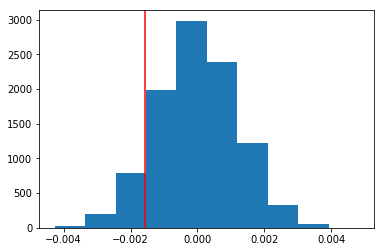

In [91]:
plt.hist(p_diffs);
plt.axvline(p_conv_new - p_conv_old, color='r');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [92]:
(p_diffs > (p_conv_new - p_conv_old)).mean()

0.90280000000000005

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

At point j. we compute the probability of observing the mean difference in the sample or a value more favorable for the alternative, assuming the null hypothesis is true. This is called the p-value. With respect to the histogram above, it represents the area in the plot to the right of the red vertical line. 

A high p-value, as it is the case here, indicates there is no reason to reject the null hypothesis (the old page has an equal or better conversion probability than the new page). 

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [93]:
import statsmodels.api as sm

convert_old = len(df2[(df2.landing_page == 'old_page') & (df2.converted == 1)].index)
convert_new = len(df2[(df2.landing_page == 'new_page') & (df2.converted == 1)].index)
n_old = len(df2[df2.landing_page == 'old_page'].index)
n_new = len(df2[df2.landing_page == 'new_page'].index)
print(convert_old,convert_new,n_old,n_new)

17489 17264 145274 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [94]:
zstat, pval = sm.stats.proportions_ztest([convert_new,convert_old],[n_new,n_old], alternative='larger')

In [95]:
pval

0.90505831275902449

In [96]:
zstat

-1.3109241984234394

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The Z-score indicates that the area to the left of the observed value is around 0.095 (http://www.z-table.com/). The result is consistent with the one at parts j and k as it translates to a high p-value and implicitly a high likelihood that the statistic comes from the null hypothesis.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Since the dependent variable is binary, the correct option is to use logistic regression.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [97]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [98]:
df2['intercept'] = 1

In [99]:
df2['ab_page'] = pd.get_dummies(df2.group)['treatment']
df2.head(5)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [100]:
model = sm.Logit(df2.converted,df2[['intercept','ab_page']])
results = model.fit();

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [101]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 03 Apr 2019   Pseudo R-squ.:               8.077e-06
Time:                        20:20:12   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

For the regression model parameters the null hypothesis is that the parameter is equal to 0 and the alternative is that it is useful in determining the value of the dependent variable.

For Part II the null was that the difference of proportions (between conversion from new page versus old page) is less or equal to 0. 

We can see that the Z-score is roughly the same as the one from the proportions ztest, in part II. The difference here is that now due to the alternative with the inequality, the area under the plot we are considering is the one under the tails and not everything to the right of the observed value. 

In this case, the lower the p-value the more significant the parameter is. Since the p-value for ab_page is relatively high, the importance of the parameter is low, which is consistent with the previous results. 


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

It is beneficial to add new factors into the regression model as it can help increase the prediction rate and reduce the number of error in estimating the dependent variable. 

Issues can also appear by adding new factors if for example there is correlation between them (confounding issue). 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [102]:
df_countries = pd.read_csv('countries.csv')
df_countries.head(3)

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK


In [103]:
df2 = df2.join(df_countries.set_index('user_id'), on='user_id')
df2.head(3)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA


In [104]:
df2.country.nunique()

3

In [105]:
df2 = df2.join(pd.get_dummies(df2['country']))


In [106]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA,1,0,0
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK,0,1,0
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA,1,0,0


In [107]:
model = sm.Logit(df2.converted,df2[['intercept','ab_page','CA','UK']])
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Wed, 03 Apr 2019   Pseudo R-squ.:               2.323e-05
Time:                        20:20:31   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

The p-values for the countries are above a 5% or even 10% type 1 error threshold so they cannot be considered significant for the model.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [108]:
df2['ab_page_CA'] = df2.ab_page * df2.CA
df2['ab_page_UK'] = df2.ab_page * df2.UK
df2.head(5)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US,ab_page_CA,ab_page_UK
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1,0,0
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1,0,0
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA,1,0,0,1,0
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK,0,1,0,0,1
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA,1,0,0,1,0


In [109]:
model = sm.Logit(df2.converted,df2[['intercept','ab_page','CA','UK','ab_page_CA','ab_page_UK']])
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Wed, 03 Apr 2019   Pseudo R-squ.:               3.482e-05
Time:                        20:20:41   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
CA            -0.0175      0.038     -0.465      0.642      -0.091       0.056
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
ab_page_CA    -0.0469      0.054     -0.872      0.383      -0.152       0.059
ab_page_UK     0.0314      0.027      1.181      0.238      -0.021       0.084
==============================================================================
"""

P-values are high for all variables, indicating that they are not significant for the model. 